In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.api as sm

# Modeling for prevention factors

In [330]:
df = pd.read_csv('./consolidated_dataframe.csv')

In [331]:
X = df.drop(columns = 'suicidality')
y = df['suicidality']

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)

In [333]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('log', LogisticRegression())
])

params = {
    'log__C' : [.3, .5, 1, 2]
}

gs = GridSearchCV(pipe, param_grid = params, cv = 5, n_jobs = 4)

In [334]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('log',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                 

In [335]:
gs.score(X_train, y_train)

0.6764705882352942

In [336]:
gs.score(X_test, y_test)

0.6527514231499051

In [337]:
log = sm.Logit(y, X)
score = log.fit()

Optimization terminated successfully.
         Current function value: 0.623141
         Iterations 6


In [338]:
score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            suicidality   No. Observations:                 4216
Model:                          Logit   Df Residuals:                     4203
Method:                           MLE   Df Model:                           12
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.1010
Time:                        17:19:57   Log-Likelihood:                -2627.2
converged:                       True   LL-Null:                       -2922.3
Covariance Type:            nonrobust   LLR p-value:                1.255e-118
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
drug_dependency        1.3937      0.152      9.149      0.000       1.095       1.692
alc_abuse              0.8238      0.130      6.350      0.000       0.570       1.078
drug_abuse             0.8553      0.252      3.388      0.001       0.360       1.350
been_to_jail       -3.028e-05      0.013     -0.002      0.998      -0.025       0.025
overall_health        -0.3341      0.036     -9.370      0.000      -0.404      -0.264
sex                    0.3159      0.063      4.997      0.000       0.192       0.440
married                0.2799      0.027     10.412      0.000       0.227       0.333
education_level        0.0193      0.035      0.555      0.579      -0.049       0.087
age_category          -0.0627      0.032     -1.934      0.053      -0.126       0.001
race                  -0.0125      0.014     -0.866      0.387      -0.041       0.016
enrolled_school       -0.0391      0.024     -1.603      0.109      -0.087       0.009
employment_status      0.1188      0.027      4.406      0.000       0.066       0.172
received_treatment    -0.3820      0.068     -5.643      0.000      -0.515      -0.249
======================================================================================
"""

In [339]:
coefs = dict(score.params)

In [340]:
coefs

{'drug_dependency': 1.3937116438565407,
 'alc_abuse': 0.8237937237313198,
 'drug_abuse': 0.8552807347204628,
 'been_to_jail': -3.0283650812414862e-05,
 'overall_health': -0.3340994910093474,
 'sex': 0.3159120995938247,
 'married': 0.2798707910870303,
 'education_level': 0.019292028559402496,
 'age_category': -0.06269413737276848,
 'race': -0.01248284687234661,
 'enrolled_school': -0.03909465190248398,
 'employment_status': 0.11877172972914676,
 'received_treatment': -0.3819731200858586}

In [341]:
logits = {k:np.exp(v) for k, v in coefs.items()}

logits

{'drug_dependency': 4.029779435664764,
 'alc_abuse': 2.2791298462319136,
 'drug_abuse': 2.352034585671247,
 'been_to_jail': 0.9999697168077327,
 'overall_health': 0.7159825448574654,
 'sex': 1.3715096940682334,
 'married': 1.3229588632169798,
 'education_level': 1.0194793222285057,
 'age_category': 0.9392307053312908,
 'race': 0.9875947406872492,
 'enrolled_school': 0.9616596819200487,
 'employment_status': 1.1261128308658483,
 'received_treatment': 0.6825133988603859}

In [342]:
df_coef = pd.DataFrame.from_dict(logits, orient='index')

df_coef.rename(columns = {0: 'logit'}, inplace = True)

df_coef['percentage change'] = (df_coef['logit']-1) * 100

In [343]:
df_coef = df_coef.sort_values(by = 'percentage change', ascending = False)

## Visualizations

In [217]:
df_coef

,logit,percentage change
drug_dependency,4.029779,302.977944
drug_abuse,2.352035,135.203459
alc_abuse,2.279130,127.912985
sex,1.371510,37.150969
married,1.322959,32.295886
employment_status,1.126113,12.611283
education_level,1.019479,1.947932
been_to_jail,0.999970,-0.003028
race,0.987595,-1.240526
enrolled_school,0.961660,-3.834032


In [236]:
df_coef_extremes = pd.concat([df_coef[:4], df_coef[10:]])

In [237]:
df_coef_extremes.rename({'age_category': 'age'}, inplace = True)

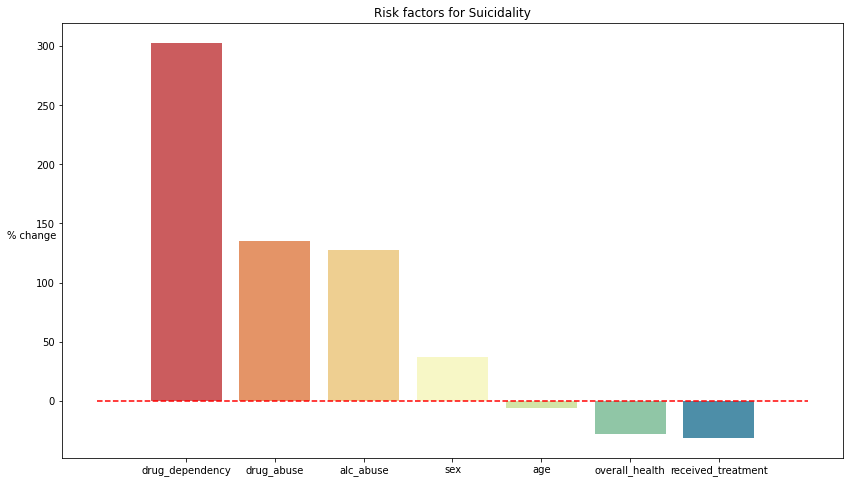

In [327]:
plt.figure(figsize=(14,8))
sns.barplot(x = df_coef_extremes.index, y = 'percentage change', 
            data = df_coef_extremes, palette = 'Spectral')
plt.title("Risk factors for Suicidality")
plt.ylabel('% change', rotation = 0)
plt.hlines(y=0, xmin = -1, xmax = 7, linestyles = 'dashed', colors = 'red');

# Specific Drug Risk Factors

In [267]:
df_drug = pd.read_csv('./drug_specific_dataframe.csv')

In [268]:
df_drug.columns

Index(['cigflag', 'cigyr', 'cigmon', 'alcflag', 'alcyr', 'alcmon', 'mrjflag',
       'mrjyr', 'mrjmon', 'cocflag', 'cocyr', 'cocmon', 'crkflag', 'herflag',
       'heryr', 'hermon', 'halflag', 'halyr', 'halmon', 'ecsflag', 'ecsyr',
       'ecsmon', 'inhflag', 'anlflag', 'anlyr', 'anlmon', 'cpnstmfg',
       'cpnstmyr', 'cpnstmmn', 'cpnmthfg', 'cpnmthyr', 'cpnmthmn', 'sedflag',
       'sedyr', 'sedmon', 'sumflag', 'summon', 'sumyr', 'bingehvy', 'nilalmon',
       'fualc18', 'fumj18', 'fucoc18', 'dnicnsp', 'suicidality'],
      dtype='object')

In [287]:
X = df_drug.drop(columns = 'suicidality')
y = df_drug['suicidality']

In [275]:
y.value_counts()

1    2108
0    2108
Name: suicidality, dtype: int64

In [276]:
log = sm.Logit(y, X)
score = log.fit()
score.summary()

Optimization terminated successfully.
         Current function value: 0.634363
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            suicidality   No. Observations:                 4216
Model:                          Logit   Df Residuals:                     4172
Method:                           MLE   Df Model:                           43
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                 0.08481
Time:                        15:58:27   Log-Likelihood:                -2674.5
converged:                       True   LL-Null:                       -2922.3
Covariance Type:            nonrobust   LLR p-value:                 2.752e-78
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cigflag       -0.3636      0.097     -3.753      0.000      -0.553      -0.174
cigyr          0.4426      0.146      3.041      0.002       0.157       0.728
cigmon        -0.0431      0.154     -0.280      0.780      -0.345       0.259
alcflag       -0.2303      0.143     -1.610      0.107      -0.511       0.050
alcyr          0.3271      0.126      2.604      0.009       0.081       0.573
alcmon        -0.4683      0.193     -2.421      0.015      -0.847      -0.089
mrjflag       -0.2557      0.166     -1.539      0.124      -0.581       0.070
mrjyr          0.1954      0.195      1.001      0.317      -0.187       0.578
mrjmon         0.2438      0.250      0.974      0.330      -0.247       0.734
cocflag       -0.1349      0.127     -1.063      0.288      -0.384       0.114
cocyr         -0.0461      0.221     -0.208      0.835      -0.479       0.387
cocmon        -0.0140      0.337     -0.042      0.967      -0.674       0.646
crkflag        0.3203      0.184      1.745      0.081      -0.039       0.680
herflag        0.1166      0.251      0.464      0.643      -0.376       0.609
heryr         -0.0316      0.537     -0.059      0.953      -1.085       1.022
hermon         0.2749      0.742      0.370      0.711      -1.180       1.729
halflag       -0.1922      0.138     -1.395      0.163      -0.462       0.078
halyr          0.3405      0.274      1.241      0.214      -0.197       0.878
halmon        -0.5872      0.407     -1.441      0.150      -1.386       0.211
ecsflag       -0.0569      0.156     -0.363      0.716      -0.364       0.250
ecsyr         -0.0832      0.336     -0.248      0.804      -0.742       0.576
ecsmon         0.2914      0.572      0.509      0.611      -0.830       1.413
inhflag        0.3452      0.115      3.014      0.003       0.121       0.570
anlflag        0.4340      0.105      4.140      0.000       0.229       0.640
anlyr          0.0135      0.170      0.080      0.937      -0.319       0.346
anlmon        -0.0951      0.231     -0.412      0.681      -0.548       0.358
cpnstmfg       0.1789      0.167      1.068      0.285      -0.149       0.507
cpnstmyr       0.1125      0.314      0.358      0.720      -0.502       0.727
cpnstmmn      -0.1871      0.438     -0.427      0.669      -1.046       0.672
cpnmthfg      -0.0708      0.217     -0.326      0.745      -0.497       0.355
cpnmthyr       0.4557      0.554      0.823      0.410      -0.629       1.541
cpnmthmn      -0.2697      0.738     -0.365      0.715      -1.716       1.177
sedflag        0.2552      0.222      1.147      0.251      -0.181       0.691
sedyr          0.0154      0.586      0.026      0.979      -1.133       1.163
sedmon        -0.1760      0.773     -0.228      0.820      -1.692       1.340
sumflag        0.5935      0.165      3.596      0.000       0.270       0.917
summon        -0.1672      0.256     -0.654      0.513      -0.668       0.334
sumyr          0.4186      0.189      2.212      0.027       0.048       0.790
bi

In [285]:
raw_coefs = dict(score.params)

In [318]:
significant_drugs = ['anlflag', 'inhflag', 'alcyr', 'crkflag', 
                    ]

In [319]:
drug_coefs = {k:np.exp(v) for k,v in raw_coefs.items() if k in significant_drugs}

In [320]:
drug_coefs = pd.DataFrame.from_dict(drug_coefs, orient='index')

In [321]:
drug_coefs.rename(columns = {0: 'logit'}, inplace = True)

drug_coefs = drug_coefs.sort_values(by = 'logit', ascending = False)

In [322]:
drug_coefs.rename({
    'sumflag' : 'any drug',
    'anlflag' : 'any illicit pain relievers',
    'inhflag' : 'any inhalents',
    'alcyr'   : 'alcohol in past year',
    'crkflag' : 'any crack cocaine use'
}, inplace = True)

In [323]:
drug_coefs

,logit
any illicit pain relievers,1.543481
any inhalents,1.412224
alcohol in past year,1.387004
any crack cocaine use,1.377517
